In [7]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [8]:
data = pd.read_pickle("train/train.pickle")

In [9]:
df = pd.DataFrame(data)
df.head(3)

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [10]:
import matplotlib.pyplot as plt

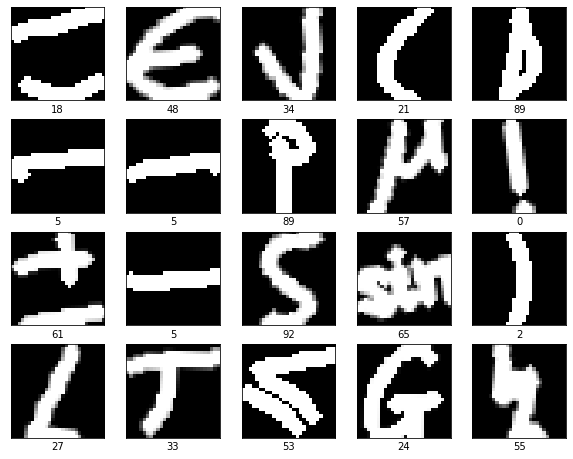

In [11]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i+50]['features'].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(list(data[i+50]['label']).index(1)) # number of class

In [12]:
del data

In [13]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [14]:
x_train = features_to_matrix(df[:70000])

In [15]:
x_train = pd.concat([x_train, features_to_matrix(df[70000:])], axis=0)

In [16]:
x_train.shape

(139976, 784)

In [19]:
import pickle
with open("x_train.pickle", "wb") as f:
    pickle.dump(x_train, f)

In [20]:
y_train = df['label']

In [21]:
del df

In [34]:
from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten, Conv2D

In [23]:
hidden_size = 64

In [24]:
classes_num = y_train.shape

In [25]:
classes_num

(139976,)

In [26]:
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))

In [27]:
with open("y_train.pickle", "wb") as f:
    pickle.dump(y_train, f)

In [28]:
classes_num = y_train.shape

In [37]:
x_reshaped = x_train.values.reshape((x_train.shape[0], 28, 28, 1))
x_reshaped[:2]

array([[[[1.],
         [1.],
         [1.],
         ...,
         [0.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [0.],
         [0.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [0.],
         [0.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(hidden_size, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(classes_num[1], activation='softmax'))

In [19]:
#model.add(Dense(hidden_size, activation='relu'))

In [25]:
#model.add(Dense(classes_num[1], activation='softmax'))

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(x_reshaped, y_train, batch_size=128, epochs=3)

Epoch 1/3
139976/139976 [==============================] - 579s 4ms/step - loss: 0.6803 - accuracy: 0.8141
Epoch 2/3
139976/139976 [==============================] - 584s 4ms/step - loss: 0.2791 - accuracy: 0.9164
Epoch 3/3
139976/139976 [==============================] - 590s 4ms/step - loss: 0.1820 - accuracy: 0.9431


In [52]:
test_data = pd.read_pickle("test/test.pickle")

In [53]:
df = pd.DataFrame(test_data)
df.head(3)

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [54]:
df.shape

(5555, 2)

In [55]:
x_test = features_to_matrix(df)

In [56]:
y_test = df['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [57]:
x_test_reshaped = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

In [58]:
y_test.shape

(5555, 101)

In [59]:
model.predict(x_test_reshaped)

array([[2.2273306e-19, 3.0915063e-18, 5.6452253e-11, ..., 1.1196577e-03,
        2.9686810e-03, 5.3352931e-17],
       [2.5075701e-07, 3.8774074e-06, 5.0822373e-14, ..., 4.3730324e-04,
        8.4167160e-02, 1.3412450e-14],
       [2.7947884e-27, 9.8087889e-22, 3.7647683e-23, ..., 1.2086480e-14,
        4.8243430e-07, 6.4395141e-29],
       ...,
       [9.7766512e-16, 5.2944979e-12, 5.5179955e-14, ..., 5.7236730e-07,
        2.1378871e-07, 8.6989172e-16],
       [1.4974522e-23, 2.1823615e-19, 2.1837928e-20, ..., 2.9034029e-13,
        2.3309608e-06, 3.6847984e-25],
       [5.7527177e-07, 3.6189618e-08, 4.3299082e-01, ..., 2.2388455e-03,
        1.2338847e-05, 1.9073508e-05]], dtype=float32)

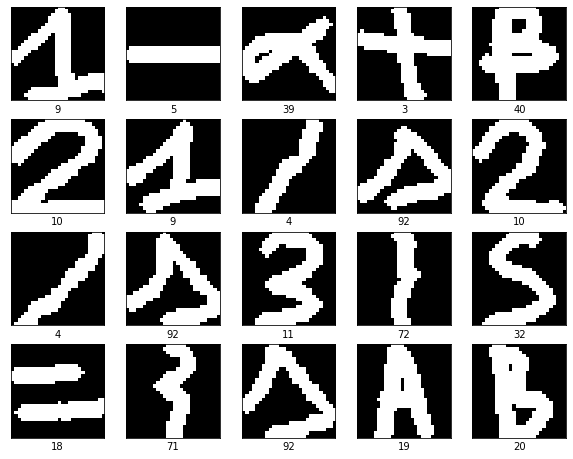

In [60]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[i+20]['features'].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(list(test_data[i+20]['label']).index(1)) # number of class

In [47]:
np.argmax(model.predict(x_test)[50])

10

In [62]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)

5555/5555 [==============================] - 5s 854us/step


In [63]:
score, acc

(0.9261160669404037, 0.7917191982269287)

In [65]:
prediction = model.predict(x_test_reshaped)

In [66]:
result = []
for i in range(x_test.shape[0]):
    result.append(np.argmax(prediction[i]))

In [67]:
true_y = []
for i in range(x_test.shape[0]):
    true_y.append(list(test_data[i]['label']).index(1))
true_y[20:40]

[9, 5, 39, 3, 40, 10, 9, 4, 92, 10, 4, 92, 11, 72, 32, 18, 71, 92, 19, 20]

In [68]:
symbol_dict = {}
with open('../classes.txt', 'r') as f:
    i = 0
    for line in f:
        symbol_dict[i] = line.strip()
        i += 1

In [69]:
symbol_dict

{0: '!',
 1: '(',
 2: ')',
 3: '+',
 4: ',',
 5: '-',
 6: '.',
 7: '/',
 8: '0',
 9: '1',
 10: '2',
 11: '3',
 12: '4',
 13: '5',
 14: '6',
 15: '7',
 16: '8',
 17: '9',
 18: '=',
 19: 'A',
 20: 'B',
 21: 'C',
 22: 'E',
 23: 'F',
 24: 'G',
 25: 'H',
 26: 'I',
 27: 'L',
 28: 'M',
 29: 'N',
 30: 'P',
 31: 'R',
 32: 'S',
 33: 'T',
 34: 'V',
 35: 'X',
 36: 'Y',
 37: '[',
 38: '\\Delta',
 39: '\\alpha',
 40: '\\beta',
 41: '\\cos',
 42: '\\div',
 43: '\\exists',
 44: '\\forall',
 45: '\\gamma',
 46: '\\geq',
 47: '\\gt',
 48: '\\in',
 49: '\\infty',
 50: '\\int',
 51: '\\lambda',
 52: '\\ldots',
 53: '\\leq',
 54: '\\lim',
 55: '\\log',
 56: '\\lt',
 57: '\\mu',
 58: '\\neq',
 59: '\\phi',
 60: '\\pi',
 61: '\\pm',
 62: '\\prime',
 63: '\\rightarrow',
 64: '\\sigma',
 65: '\\sin',
 66: '\\sqrt',
 67: '\\sum',
 68: '\\tan',
 69: '\\theta',
 70: '\\times',
 71: '\\{',
 72: '\\}',
 73: ']',
 74: 'a',
 75: 'b',
 76: 'c',
 77: 'd',
 78: 'e',
 79: 'f',
 80: 'g',
 81: 'h',
 82: 'i',
 83: 'j',
 84:

In [70]:
for i in range(df.shape[0]):
    df['label'][i] = list(test_data[i]['label']).index(1)

In [71]:
df.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",41
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",76
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",18
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",41
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",74


In [87]:
class_s = df[df['label'] == 62]

In [88]:
class_s.shape

(25, 2)

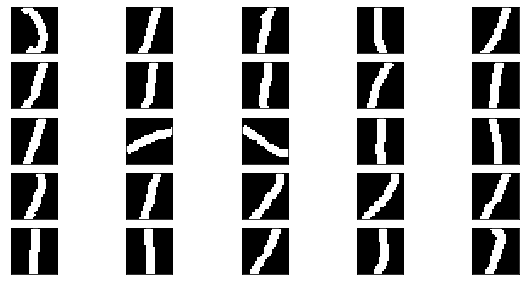

In [89]:
plt.figure(figsize=(10,10))
j = 0
for i in class_s.index:
    plt.subplot(10,5,j+1)
    j += 1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_s['features'][i].reshape((28,28)), cmap=plt.cm.binary)
    #plt.xlabel(class_s[i]['label']) # number of class

In [90]:
model.save('symbol_classifier_conv.h5')

In [112]:
model_saved = keras.models.load_model('symbol_classifier.h5')

In [113]:
model_saved.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 101)               6565      
Total params: 60,965
Trainable params: 60,965
Non-trainable params: 0
_________________________________________________________________


In [114]:
loss, acc = model_saved.evaluate(x_train[:1000], y_train[:1000])

1000/1000 [==============================] - 0s 231us/sample - loss: 0.4890 - accuracy: 0.8410


In [116]:
loss, acc = model_saved.evaluate(x_test[2849:], y_test[2849:])

2706/2706 [==============================] - 0s 96us/sample - loss: 0.8107 - accuracy: 0.7809
